In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [79]:

import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# ËÆæÁΩÆ‰∏≠ÊñáÂ≠ó‰Ωì
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # ÊàñËÄÖ ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

# Â¶ÇÊúâÂøÖË¶ÅÔºåÊ∏ÖÈô§Â≠ó‰ΩìÁºìÂ≠òÔºàÊâßË°å‰∏ÄÊ¨°Âç≥ÂèØÔºâ
cache_dir = matplotlib.get_cachedir()
font_cache = os.path.join(cache_dir, 'fontList.json')
if os.path.exists(font_cache):
    os.remove(font_cache)
    print("Â∑≤Âà†Èô§Â≠ó‰ΩìÁºìÂ≠òÔºåËØ∑ÈáçÂêØËß£ÈáäÂô®ÂêéÂÜçËøêË°å‰ª£Á†Å„ÄÇ")

In [38]:
df1 = pd.read_csv("/Users/zhaixinyue/Desktop/archive/train.csv")
meal = pd.read_csv("/Users/zhaixinyue/Desktop/archive/meal_info.csv")
flmc=pd.read_csv("/Users/zhaixinyue/Desktop/archive/fulfilment_center_info.csv")

In [39]:
df1.head()


id  week  center_id  meal_id  checkout_price  base_price  \
0  1379560     1         55     1885          136.83      152.29   
1  1466964     1         55     1993          136.83      135.83   
2  1346989     1         55     2539          134.86      135.86   
3  1338232     1         55     2139          339.50      437.53   
4  1448490     1         55     2631          243.50      242.50   

   emailer_for_promotion  homepage_featured  num_orders  
0                      0                  0         177  
1                      0                  0         270  
2                      0                  0         189  
3                      0                  0          54  
4                      0                  0          40

In [40]:
""" ‰∏ªË°®ÔºàÂ∑¶Ë°®ÔºâÔºödf
ÂâØË°®ÔºàÂè≥Ë°®ÔºâÔºömeal
ËøûÊé•ÊñπÂºèÔºöhow="left"ÔºàÂ∑¶ËøûÊé•Ôºå‰øùÁïô df ÁöÑÊâÄÊúâË°åÔºâ
ËøûÊé•ÈîÆÔºöon="meal_id"
"""

df1 = df1.merge(meal,
              how = "left",
              on = "meal_id")
df1= df1.merge(flmc,
              how = "left",
              on = "center_id")


In [41]:
year = 2022
start_date = pd.to_datetime(f'{year}-01-01')

df1['date'] = start_date + pd.to_timedelta(df1['week'] - 1, unit='W')

df1['month'] = df1['date'].dt.month
df1['quarter'] = df1['date'].dt.quarter

In [42]:
import pandas as pd
from datetime import timedelta, datetime

# Ëµ∑ÂßãÊó•Êúü
start_date = datetime(2022, 1, 1)


# ÂàõÂª∫‰∏Ä‰∏™Êó•ÊúüÊò†Â∞ÑÂáΩÊï∞
def map_week_to_date(df, start_date):
    # ÂàõÂª∫‰∏Ä‰∏™Á©∫ÁöÑÊó•ÊúüÂàó
    df['date'] = pd.NaT

    # Âæ™ÁéØÈÅçÂéÜÊØè‰∏™Âë®Êï∞
    for i in range(1, 147):  # ÂÅáËÆæÂë®Êï∞‰ªé1Âà∞146
        # ÊâæÂà∞ËØ•Âë®ÁöÑÊâÄÊúâÁ¥¢Âºï
        indices = df[df['week'] == i].index
        
        # ÂØπ‰∫éÊØè‰∏™Á¥¢ÂºïÔºåÂàÜÈÖçÊó•ÊúüÔºå‰øùËØÅ‰∏ÄÂë®ÂÜÖÊó•Êúü‰∏çË∂ÖËøá7Â§©Âæ™ÁéØ
        for j, idx in enumerate(indices):
            # ËÆ°ÁÆóÊó•ÊúüÔºåÂΩìÂâçÁ¥¢ÂºïÂØπ7Âèñ‰ΩôÔºåÁ°ÆÂÆöÊòØÂë®‰∏≠ÁöÑÂì™‰∏ÄÂ§©
            day_offset = (j % 7)
            # Êó•ÊúüÈÄíÂ¢û
            specific_date = start_date + timedelta(days=(i - 1) * 7 + day_offset)
            # Êõ¥Êñ∞DataFrame
            df.at[idx, 'date'] = specific_date

# Â∫îÁî®ÂáΩÊï∞
map_week_to_date(df1, start_date)

# ÊòæÁ§∫ÁªìÊûúÔºåÊ£ÄÊü• 'date' Âàó
print(df1[['week', 'date']].head(15))

    week       date
0      1 2022-01-01
1      1 2022-01-02
2      1 2022-01-03
3      1 2022-01-04
4      1 2022-01-05
5      1 2022-01-06
6      1 2022-01-07
7      1 2022-01-01
8      1 2022-01-02
9      1 2022-01-03
10     1 2022-01-04
11     1 2022-01-05
12     1 2022-01-06
13     1 2022-01-07
14     1 2022-01-01


In [43]:
df1.head()

id  week  center_id  meal_id  checkout_price  base_price  \
0  1379560     1         55     1885          136.83      152.29   
1  1466964     1         55     1993          136.83      135.83   
2  1346989     1         55     2539          134.86      135.86   
3  1338232     1         55     2139          339.50      437.53   
4  1448490     1         55     2631          243.50      242.50   

   emailer_for_promotion  homepage_featured  num_orders   category cuisine  \
0                      0                  0         177  Beverages    Thai   
1                      0                  0         270  Beverages    Thai   
2                      0                  0         189  Beverages    Thai   
3                      0                  0          54  Beverages  Indian   
4                      0                  0          40  Beverages  Indian   

   city_code  region_code center_type  op_area       date  month  quarter  
0        647           56      TYPE_C      2.0 2022-01-01      1        1  
1        647           56      TYPE_C      2.0 2022-01-02      1        1  
2        647           56      TYPE_C      2.0 2022-01-03      1        1  
3        647           56      TYPE_C      2.0 2022-01-04      1        1  
4        647           56      TYPE_C      2.0 2022-01-05      1        1

In [44]:
df1.count()

id                       456548
week                     456548
center_id                456548
meal_id                  456548
checkout_price           456548
base_price               456548
emailer_for_promotion    456548
homepage_featured        456548
num_orders               456548
category                 456548
cuisine                  456548
city_code                456548
region_code              456548
center_type              456548
op_area                  456548
date                     456548
month                    456548
quarter                  456548
dtype: int64

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

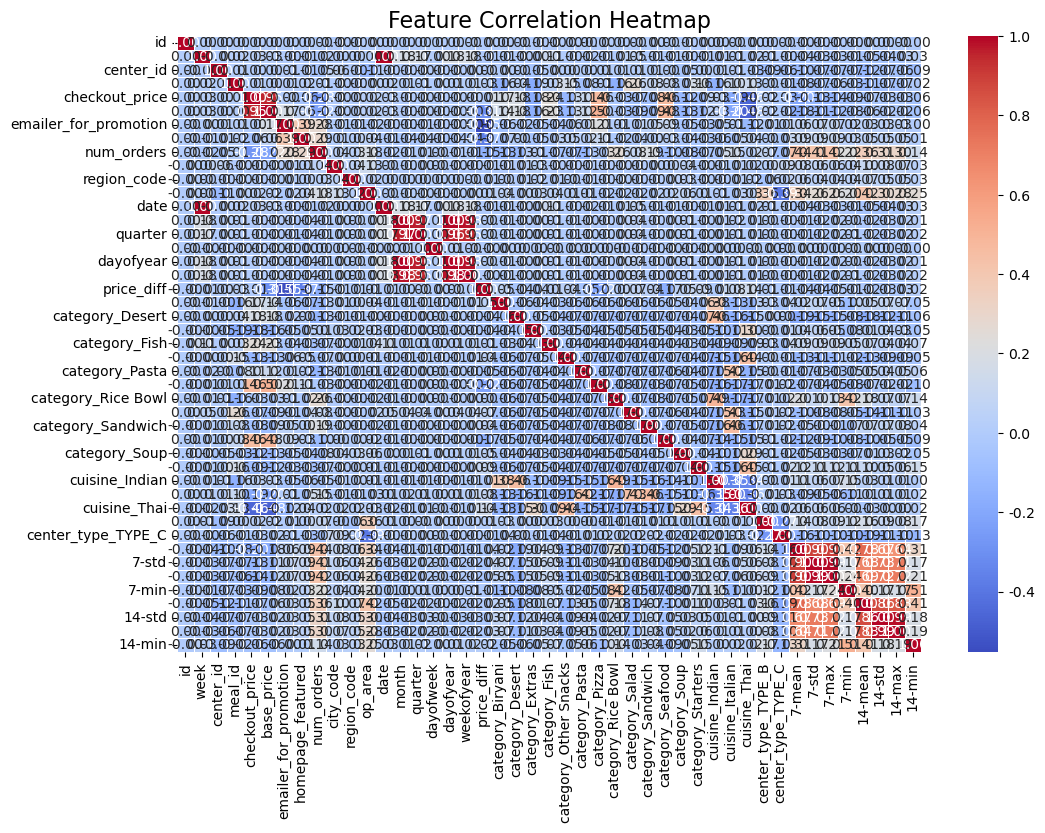

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ÂÅáËÆæ df1 ÊòØ‰Ω†ÁöÑÊï∞ÊçÆÈõÜ
# ÂÖàÁ°Æ‰øùÊó•ÊúüÂàó‰∏∫ datetime Á±ªÂûã
df1['date'] = pd.to_datetime(df1['date'])

# 1. Êó∂Èó¥Áõ∏ÂÖ≥ÁâπÂæÅ
df1['dayofweek'] = df1['date'].dt.dayofweek  # ‰∏ÄÂë®‰∏≠ÁöÑÊüêÂ§©
df1['month'] = df1['date'].dt.month  # Êúà‰ªΩ
df1['quarter'] = df1['date'].dt.quarter  # Â≠£Â∫¶
df1['dayofyear'] = df1['date'].dt.dayofyear  # ‰∏ÄÂπ¥‰∏≠ÁöÑÊüêÂ§©
df1['weekofyear'] = df1['date'].dt.isocalendar().week  # ‰∏ÄÂπ¥‰∏≠ÁöÑÊüêÂë®

# 2. ‰ª∑Ê†ºÁâπÂæÅ
df1['price_diff'] = df1['checkout_price'] - df1['base_price']  # ‰ª∑Ê†ºÂ∑ÆÂºÇ

# 3. Á±ªÂà´ÁâπÂæÅÔºà‰ΩøÁî®Áã¨ÁÉ≠ÁºñÁ†ÅÔºâ
df1 = pd.get_dummies(df1, columns=['category', 'cuisine', 'center_type'], drop_first=True)

# 4. ÊªëÂä®Á™óÂè£ÁâπÂæÅ
# ËøáÂéª 7 Â§©ÈîÄÈáèÁöÑÂùáÂÄº„ÄÅÊ†áÂáÜÂ∑Æ„ÄÅÊúÄÂ§ßÂÄº„ÄÅÊúÄÂ∞èÂÄº
df1['7-mean'] = df1['num_orders'].rolling(window=7).mean()
df1['7-std'] = df1['num_orders'].rolling(window=7).std()
df1['7-max'] = df1['num_orders'].rolling(window=7).max()
df1['7-min'] = df1['num_orders'].rolling(window=7).min()

# ËøáÂéª 14 Â§©ÈîÄÈáèÁöÑÂùáÂÄº„ÄÅÊ†áÂáÜÂ∑Æ„ÄÅÊúÄÂ§ßÂÄº„ÄÅÊúÄÂ∞èÂÄº
df1['14-mean'] = df1['num_orders'].rolling(window=14).mean()
df1['14-std'] = df1['num_orders'].rolling(window=14).std()
df1['14-max'] = df1['num_orders'].rolling(window=14).max()
df1['14-min'] = df1['num_orders'].rolling(window=14).min()

# 5. Âà†Èô§ÂåÖÂê´NaNÂÄºÁöÑË°åÔºàÁî±‰∫éÊªëÂä®Á™óÂè£ÁâπÂæÅ‰∫ßÁîüÁöÑNaNÂÄºÔºâ
df1 = df1.dropna()

# 6. ËÆ°ÁÆóÁâπÂæÅ‰πãÈó¥ÁöÑÁõ∏ÂÖ≥ÊÄßÁü©Èòµ
corr_matrix = df1.corr()

# 7. ÁªòÂà∂ÁÉ≠ÂäõÂõæ
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f', cbar=True)

# ËÆæÁΩÆÊ†áÈ¢ò
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.show()


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

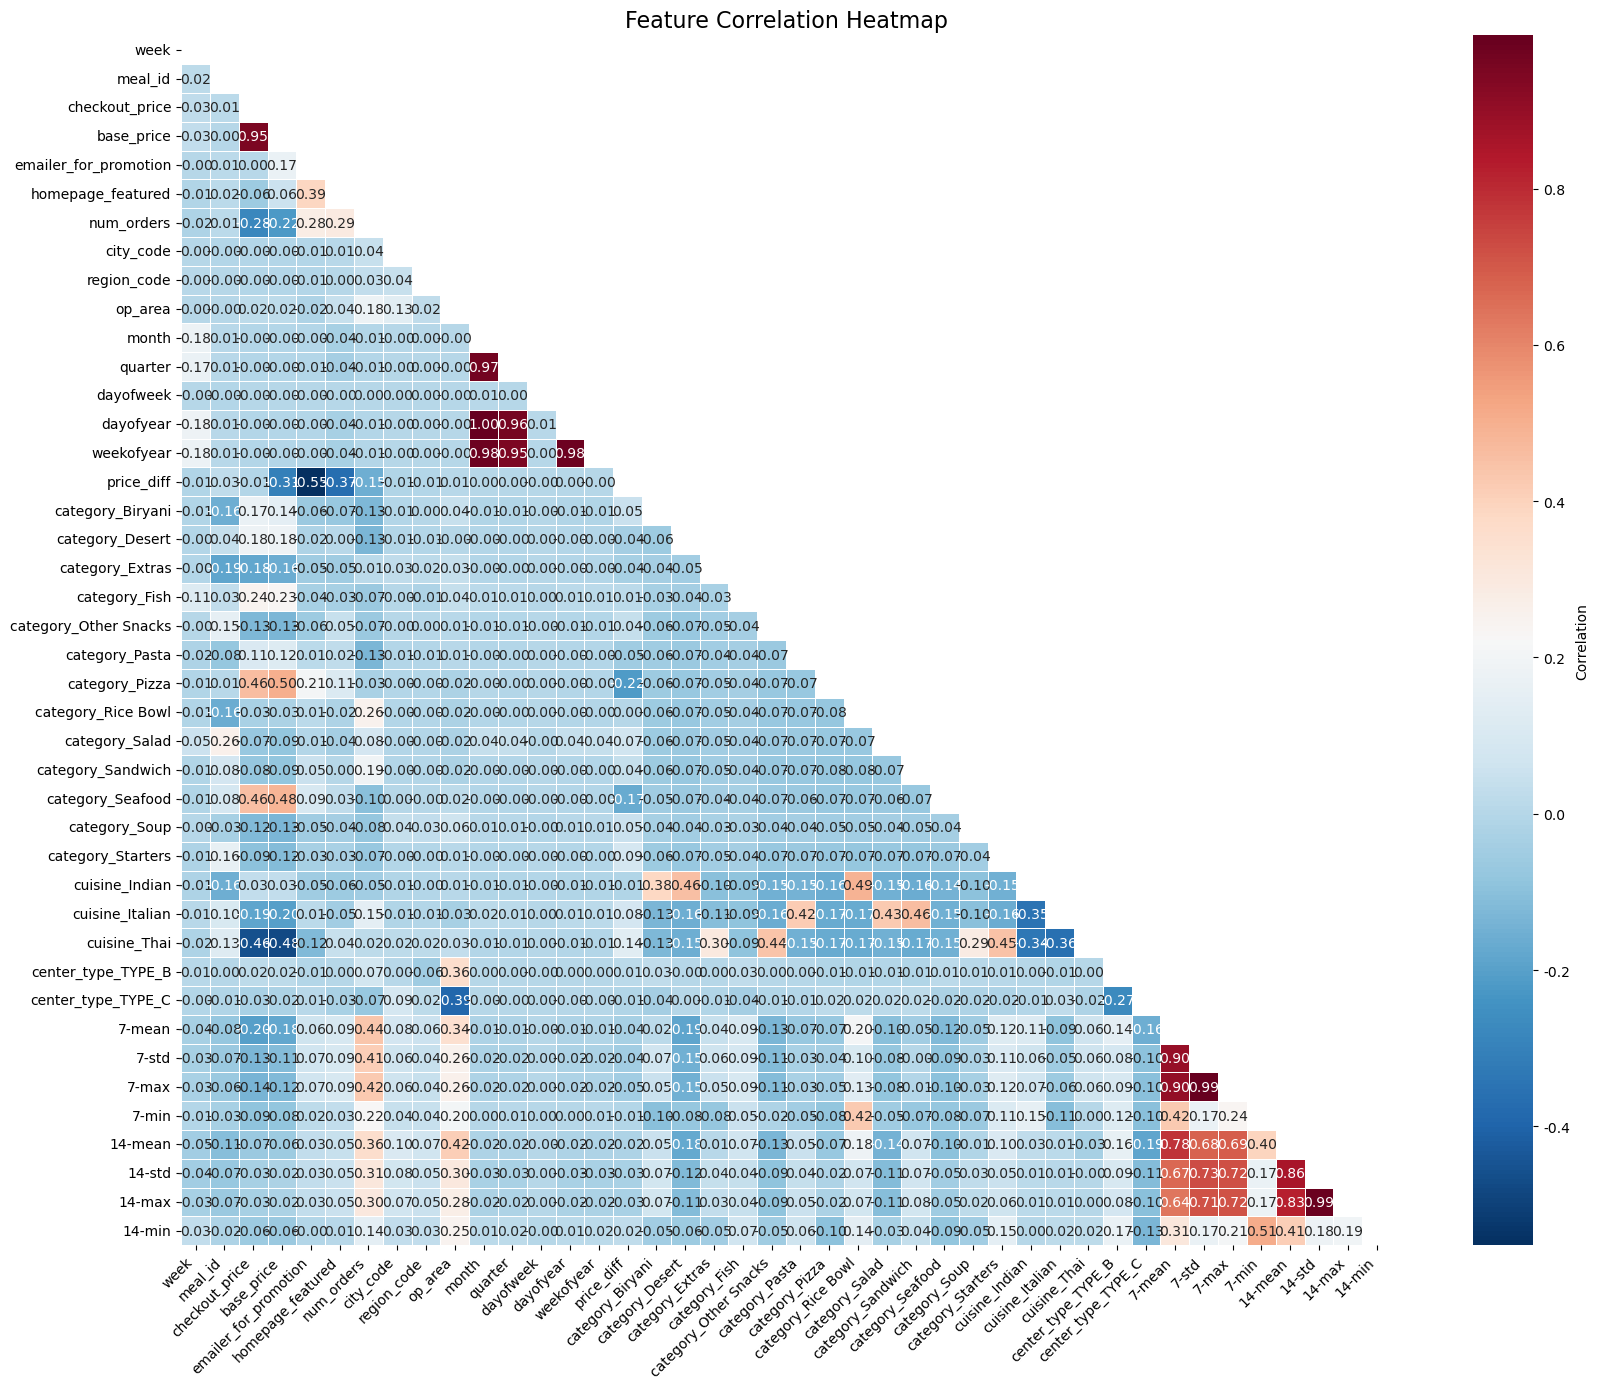

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ËÆ°ÁÆóÁõ∏ÂÖ≥ÊÄßÁü©ÈòµÔºåÂéªÊéâ‰∏çÈúÄË¶ÅÁöÑÂàó
df_corr = df1.drop(columns=['id', 'center_id', 'date']).corr()

# ËÆæÁΩÆÁªòÂõæÂ∞∫ÂØ∏
plt.figure(figsize=(18, 14))  # Â¢ûÂä†ÂõæÂÉèÂ§ßÂ∞è

# ÁªòÂà∂ÁÉ≠ÂäõÂõæ
sns.heatmap(df_corr, 
            annot=True,  # Âú®ÁÉ≠ÂäõÂõæ‰∏äÊòæÁ§∫Áõ∏ÂÖ≥Á≥ªÊï∞
            cmap='RdBu_r',  # ‰ΩøÁî®Á∫¢ËìùÈÖçËâ≤ÊñπÊ°àÔºåÁ°Æ‰øùÈ¢úËâ≤ÂØπÊØîÊòéÊòæ
            linewidths=0.5,  # ËÆæÁΩÆÂçïÂÖÉÊ†º‰πãÈó¥ÁöÑÂàÜÈöîÁ∫øÂÆΩÂ∫¶
            fmt='.2f',  # ËÆæÁΩÆÊï∞Â≠óÊ†ºÂºè‰∏∫Â∞èÊï∞ÁÇπÂêé‰∏§‰Ωç
            cbar_kws={'label': 'Correlation'},  # ÁªôËâ≤Êù°Âä†‰∏äÊ†áÁ≠æ
            annot_kws={"size": 10},  # ËÆæÁΩÆÊ≥®ÈáäÂ≠ó‰ΩìÂ§ßÂ∞è
            mask=np.triu(df_corr),  # Âè™ÊòæÁ§∫‰∏ã‰∏âËßíÁü©Èòµ
            square=True,  # ‰øùËØÅÂõæË°®‰∏∫Ê≠£ÊñπÂΩ¢ÔºåÈÅøÂÖçÊ†áÁ≠æÈáçÂè†
            xticklabels=df_corr.columns,  # xËΩ¥Ê†áÁ≠æ
            yticklabels=df_corr.columns,  # yËΩ¥Ê†áÁ≠æ
            cbar=True)  # ÊòæÁ§∫È¢úËâ≤Êù°

# ÊóãËΩ¨xËΩ¥Ê†áÁ≠æÔºåÈÅøÂÖçÈáçÂè†
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, ha='right', fontsize=10)

# ËÆæÁΩÆÊ†áÈ¢ò
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.tight_layout()  # Ëá™Âä®Ë∞ÉÊï¥Â≠êÂõæÂèÇÊï∞
plt.show()

In [47]:
import pandas as pd

# ËÆ°ÁÆóÁõ∏ÂÖ≥ÊÄßÁü©Èòµ
correlation_matrix = df1.corr()

# Ëé∑Âèñ num_orders ‰∏éÂÖ∂‰ªñÁâπÂæÅÁöÑÁõ∏ÂÖ≥Á≥ªÊï∞
num_orders_corr = correlation_matrix["num_orders"].drop("num_orders")

# ÊåâÁªùÂØπÂÄºÈôçÂ∫èÊéíÂàó
num_orders_corr_sorted = num_orders_corr.abs().sort_values(ascending=False)

# ËΩ¨Êç¢‰∏∫ DataFrame
df_num_orders_corr = pd.DataFrame({
    "Feature": num_orders_corr_sorted.index,
    "Correlation": num_orders_corr_sorted.values
})

# ÊòæÁ§∫Ââç 10 ‰∏™ÊúÄÁõ∏ÂÖ≥ÁöÑÁâπÂæÅ
print(df_num_orders_corr.head(60))


                  Feature  Correlation
0                  7-mean     0.435820
1                   7-max     0.421955
2                   7-std     0.409558
3                 14-mean     0.360206
4                  14-std     0.307121
5                  14-max     0.302869
6       homepage_featured     0.294473
7          checkout_price     0.282114
8   emailer_for_promotion     0.277151
9      category_Rice Bowl     0.257594
10                  7-min     0.223440
11             base_price     0.222313
12      category_Sandwich     0.189774
13                op_area     0.176998
14             price_diff     0.152945
15        cuisine_Italian     0.149446
16                 14-min     0.144571
17         category_Pasta     0.130124
18        category_Desert     0.129376
19       category_Biryani     0.126996
20       category_Seafood     0.101767
21         category_Salad     0.079174
22          category_Soup     0.076761
23     center_type_TYPE_C     0.073663
24     center_type_TYPE_B

In [48]:
# ËÆæÂÆöÁõ∏ÂÖ≥ÊÄßÈòàÂÄº
corr_threshold = 0.1

# ÈÄâÊã©È´ò‰∫éÈòàÂÄºÁöÑÁâπÂæÅ
selected_features = df_num_orders_corr[df_num_orders_corr["Correlation"] > corr_threshold]["Feature"].tolist()

# ËøáÊª§ÂéüÂßãÊï∞ÊçÆÈõÜ
df_selected = df1[selected_features + ["num_orders"]+["week"]]

In [49]:
df_selected.count()


7-mean                   456535
7-max                    456535
7-std                    456535
14-mean                  456535
14-std                   456535
14-max                   456535
homepage_featured        456535
checkout_price           456535
emailer_for_promotion    456535
category_Rice Bowl       456535
7-min                    456535
base_price               456535
category_Sandwich        456535
op_area                  456535
price_diff               456535
cuisine_Italian          456535
14-min                   456535
category_Pasta           456535
category_Desert          456535
category_Biryani         456535
category_Seafood         456535
num_orders               456535
week                     456535
dtype: int64

In [50]:
df_selected.head()

7-mean  7-max       7-std     14-mean      14-std  14-max  \
13  559.428571  972.0  278.889379  347.428571  297.276798   972.0   
14  611.571429  972.0  276.259454  388.785714  311.669741   972.0   
15  559.571429  972.0  334.935744  377.214286  319.332279   972.0   
16  467.000000  972.0  383.431437  365.714286  329.372931   972.0   
17  353.428571  972.0  378.112354  363.857143  331.333171   972.0   

    homepage_featured  checkout_price  emailer_for_promotion  \
13                  0          445.23                      0   
14                  0          264.84                      1   
15                  0          282.33                      0   
16                  0          243.50                      0   
17                  0          486.00                      0   

    category_Rice Bowl  ...  op_area  price_diff  cuisine_Italian  14-min  \
13                True  ...      2.0       -1.00            False    28.0   
14                True  ...      2.0      -32.95            False    28.0   
15               False  ...      2.0        1.00            False    28.0   
16               False  ...      2.0      -97.03             True    28.0   
17               False  ...      2.0        1.00             True    28.0   

    category_Pasta  category_Desert  category_Biryani  category_Seafood  \
13           False            False             False             False   
14           False            False             False             False   
15           False            False             False             False   
16            True            False             False             False   
17            True            False             False             False   

    num_orders  week  
13         420     1  
14         756     1  
15         108     1  
16          28     1  
17          28     1  

[5 rows x 23 columns]

In [52]:
import numpy as np

# ÊõøÊç¢ Inf ‰∏∫ NaN
df_selected.replace([np.inf, -np.inf], np.nan, inplace=True)

# Â°´ÂÖÖ NaNÔºàÂèØ‰ª•Áî®ÂùáÂÄºÂ°´ÂÖÖÔºâ
df_selected.fillna(df_selected.mean(), inplace=True)


/var/folders/gr/_p8chfx50zqdqlly1ny_19d00000gn/T/ipykernel_7590/963298847.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.replace([np.inf, -np.inf], np.nan, inplace=True)
/var/folders/gr/_p8chfx50zqdqlly1ny_19d00000gn/T/ipykernel_7590/963298847.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.fillna(df_selected.mean(), inplace=True)


In [228]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Á°Æ‰øùÊï∞ÊçÆÊ†ºÂºèÊ≠£Á°Æ
X = df_selected.drop(columns=["num_orders"])  # ÁõÆÊ†áÂèòÈáè‰∏çËÆ°ÁÆó VIF
X = X.astype(float)  # Âº∫Âà∂ËΩ¨Êç¢‰∏∫ float Á±ªÂûã

# ËÆ°ÁÆó VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# ËøáÊª§È´ò VIF ÁâπÂæÅ
vif_threshold = 15
high_vif_features = vif_data[vif_data["VIF"] > vif_threshold]["Feature"].tolist()

# Âà†Èô§È´ò VIF ÁâπÂæÅ
df_selected_vif = df_selected.drop(columns=high_vif_features)

print(f"Â∑≤Âà†Èô§È´òÂÖ±Á∫øÊÄßÁâπÂæÅ: {high_vif_features}")
print("ÊúÄÁªà‰øùÁïôÁöÑÁâπÂæÅ:", df_selected_vif.columns)

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Â∑≤Âà†Èô§È´òÂÖ±Á∫øÊÄßÁâπÂæÅ: ['7-mean', '7-max', '7-std', '14-mean', '14-std', '14-max', 'checkout_price', 'base_price', 'price_diff']
ÊúÄÁªà‰øùÁïôÁöÑÁâπÂæÅ: Index(['homepage_featured', 'emailer_for_promotion', 'category_Rice Bowl',
       '7-min', 'category_Sandwich', 'op_area', 'cuisine_Italian', '14-min',
       'category_Pasta', 'category_Desert', 'category_Biryani',
       'category_Seafood', 'num_orders', 'week'],
      dtype='object')


In [229]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Á°Æ‰øùÊï∞ÊçÆÊ†ºÂºèÊ≠£Á°Æ
X = df_selected.drop(columns=["num_orders"])  # ÁõÆÊ†áÂèòÈáè‰∏çËÆ°ÁÆó VIF
X = X.astype(float)  # Âº∫Âà∂ËΩ¨Êç¢‰∏∫ float Á±ªÂûã

# ËÆ°ÁÆó VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# ËøáÊª§È´ò VIF ÁâπÂæÅ
vif_threshold = 20
high_vif_features = vif_data[vif_data["VIF"] > vif_threshold]["Feature"].tolist()

# Á°Æ‰øù‰øùÁïô 'price_diff' Âíå 'base_price'
features_to_keep = ["price_diff", "base_price"]
high_vif_features = [f for f in high_vif_features if f not in features_to_keep]

# Âà†Èô§È´ò VIF ÁâπÂæÅÔºà‰∏çÂà†Èô§ 'price_diff' Âíå 'base_price'Ôºâ
df_selected_vif = df_selected.drop(columns=high_vif_features)

print(f"Â∑≤Âà†Èô§È´òÂÖ±Á∫øÊÄßÁâπÂæÅ: {high_vif_features}")
print("ÊúÄÁªà‰øùÁïôÁöÑÁâπÂæÅ:", df_selected_vif.columns)



/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Â∑≤Âà†Èô§È´òÂÖ±Á∫øÊÄßÁâπÂæÅ: ['7-mean', '7-max', '7-std', '14-mean', '14-std', '14-max', 'checkout_price']
ÊúÄÁªà‰øùÁïôÁöÑÁâπÂæÅ: Index(['homepage_featured', 'emailer_for_promotion', 'category_Rice Bowl',
       '7-min', 'base_price', 'category_Sandwich', 'op_area', 'price_diff',
       'cuisine_Italian', '14-min', 'category_Pasta', 'category_Desert',
       'category_Biryani', 'category_Seafood', 'num_orders', 'week'],
      dtype='object')


In [55]:
df_selected_vif.count()

homepage_featured        456535
emailer_for_promotion    456535
category_Rice Bowl       456535
7-min                    456535
base_price               456535
category_Sandwich        456535
op_area                  456535
price_diff               456535
cuisine_Italian          456535
14-min                   456535
category_Pasta           456535
category_Desert          456535
category_Biryani         456535
category_Seafood         456535
num_orders               456535
week                     456535
dtype: int64

In [58]:
df_selected_vif.to_csv("/Users/zhaixinyue/Desktop/archive/df_selected_vif.csv", index=False)


In [272]:

import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# ËÆæÁΩÆ‰∏≠ÊñáÂ≠ó‰Ωì
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # ÊàñËÄÖ ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

# Â¶ÇÊúâÂøÖË¶ÅÔºåÊ∏ÖÈô§Â≠ó‰ΩìÁºìÂ≠òÔºàÊâßË°å‰∏ÄÊ¨°Âç≥ÂèØÔºâ
cache_dir = matplotlib.get_cachedir()
font_cache = os.path.join(cache_dir, 'fontList.json')
if os.path.exists(font_cache):
    os.remove(font_cache)
    print("Â∑≤Âà†Èô§Â≠ó‰ΩìÁºìÂ≠òÔºåËØ∑ÈáçÂêØËß£ÈáäÂô®ÂêéÂÜçËøêË°å‰ª£Á†Å„ÄÇ")

In [260]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from hyperopt import fmin, tpe, hp, Trials


In [261]:
# ËØªÂèñÊï∞ÊçÆ
df_vif = pd.read_csv("/Users/zhaixinyue/Desktop/archive/df_selected_vif.csv")
df = df_vif.copy()  # Â§çÂà∂Êï∞ÊçÆÔºåÈÅøÂÖç‰øÆÊîπÂéü DataFrame


In [262]:
df_vif.count()

homepage_featured        456535
emailer_for_promotion    456535
category_Rice Bowl       456535
7-min                    456535
base_price               456535
category_Sandwich        456535
op_area                  456535
price_diff               456535
cuisine_Italian          456535
14-min                   456535
category_Pasta           456535
category_Desert          456535
category_Biryani         456535
category_Seafood         456535
num_orders               456535
week                     456535
dtype: int64

In [264]:
# **ÁõÆÊ†áÂèòÈáèÂÅèÊÄÅÊ£ÄÊü•**
print("ÂéüÂßã num_orders ÂÅèÂ∫¶(Skewness):", df["num_orders"].skew())

ÂéüÂßã num_orders ÂÅèÂ∫¶(Skewness): 6.930042235801846


In [265]:
# **ÂØπÁõÆÊ†áÂèòÈáèÂèñÂØπÊï∞ÂèòÊç¢ÔºàLog1p ‰ª•Èò≤Ê≠¢ 0 ÂÄºÔºâ**
df["num_orders"] = np.log1p(df["num_orders"])

In [266]:
# **ÈáçÊñ∞Ê£ÄÊü• num_orders ÂÅèÂ∫¶**
print("ÂØπÊï∞ÂèòÊç¢Âêé num_orders ÂÅèÂ∫¶(Skewness):", df["num_orders"].skew())

ÂØπÊï∞ÂèòÊç¢Âêé num_orders ÂÅèÂ∫¶(Skewness): -0.0219050806200443


In [267]:
# **ËÆæÂÆöÁâπÂæÅ‰∏éÁõÆÊ†áÂèòÈáè**
X = df.drop(columns=["num_orders"])  # ÁâπÂæÅ
y = df["num_orders"]  # ÁõÆÊ†áÂèòÈáèÔºàÂØπÊï∞ÂèòÊç¢ÂêéÔºâ

# **ÂàíÂàÜËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜÔºà80% ËÆ≠ÁªÉÔºå20% ÊµãËØïÔºâ**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [268]:
# **Ê†áÂáÜÂåñÊï∞ÊçÆÔºà‰∏çÂΩ±Âìç XGBoost ÂÜ≥Á≠ñÊ†ëÁªìÊûÑÔºå‰ΩÜÂèØËÉΩÊúâÂä©‰∫éÊèêÂçáÊïàÊûúÔºâ**
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

In [269]:
# **XGBoost Ë∂ÖÂèÇÊï∞ÊêúÁ¥¢ÔºàHyperoptÔºâ**
def objective(params):
    model = xgb.XGBRegressor(
        objective="reg:squarederror",
        eval_metric="rmse",
        learning_rate=params["learning_rate"],
        max_depth=int(params["max_depth"]),
        n_estimators=int(params["n_estimators"]),
        subsample=params["subsample"],
        colsample_bytree=params["colsample_bytree"],
        gamma=params["gamma"],
        reg_lambda=params["reg_lambda"],
        min_child_weight=params["min_child_weight"],
        random_state=42
    )
    
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
    y_pred = model.predict(X_test)
    return mean_squared_error(y_test, y_pred)

# **ÂÆö‰πâÊêúÁ¥¢Á©∫Èó¥**
space = {
    "learning_rate": hp.uniform("learning_rate", 0.01, 0.3),
    "max_depth": hp.choice("max_depth", np.arange(3, 10, dtype=int)),
    "n_estimators": hp.choice("n_estimators", np.arange(50, 500, 50, dtype=int)),
    "subsample": hp.uniform("subsample", 0.5, 1.0),
    "colsample_bytree": hp.uniform("colsample_bytree", 0.5, 1.0),
    "gamma": hp.uniform("gamma", 0, 5),
    "reg_lambda": hp.uniform("reg_lambda", 0, 5),
    "min_child_weight": hp.uniform("min_child_weight", 1, 10),
}

# **ÊâßË°å Hyperopt**
trials = Trials()
best_params = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)
print("ÊúÄ‰Ω≥Ë∂ÖÂèÇÊï∞:", best_params)

# **ËΩ¨Êç¢ÊúÄ‰ºòÂèÇÊï∞ÔºàHyperopt ËøîÂõûÁöÑÊï¥Êï∞ÈúÄËΩ¨Êç¢Ôºâ**
best_params["max_depth"] = int(best_params["max_depth"])
best_params["n_estimators"] = int(best_params["n_estimators"])

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [02:04<00:00,  2.48s/trial, best loss: 0.32609923866148166]
ÊúÄ‰Ω≥Ë∂ÖÂèÇÊï∞: {'colsample_bytree': 0.6870467381123994, 'gamma': 0.49589985645295886, 'learning_rate': 0.1749542486477644, 'max_depth': 4, 'min_child_weight': 7.27609159556273, 'n_estimators': 7, 'reg_lambda': 2.962123275808432, 'subsample': 0.7338390732648139}


In [270]:
# **ËÆ≠ÁªÉÊúÄÁªà XGBoost Ê®°Âûã**
final_model = xgb.XGBRegressor(
    objective="reg:squarederror",
    eval_metric="rmse",
    **best_params,
    random_state=42
)

final_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=10)

# **È¢ÑÊµãÊµãËØïÈõÜ**
y_pred_log = final_model.predict(X_test)

# **ÈÄÜÂèòÊç¢ÂõûÂéüÂßãÊï∞ÊçÆÂ∞∫Â∫¶**
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

# **ËÆ°ÁÆóËØØÂ∑ÆÊåáÊ†á**
def mean_absolute_percentage_error(y_true, y_pred):
    nonzero_mask = (y_true != 0)  # ÈÅøÂÖçÈô§‰ª•Èõ∂ÈîôËØØ
    return np.mean(np.abs((y_true[nonzero_mask] - y_pred[nonzero_mask]) / y_true[nonzero_mask])) * 100

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_true, y_pred)

# **ÊâìÂç∞ËØÑ‰º∞ÁªìÊûú**
print(f"üìå MAE:  {mae:.2f}")
print(f"üìå RMSE: {rmse:.2f}")
print(f"üìå MAPE: {mape:.2f}%")

[0]	validation_0-rmse:1.11410
[6]	validation_0-rmse:0.86954
üìå MAE:  158.47
üìå RMSE: 357.10
üìå MAPE: 96.10%


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

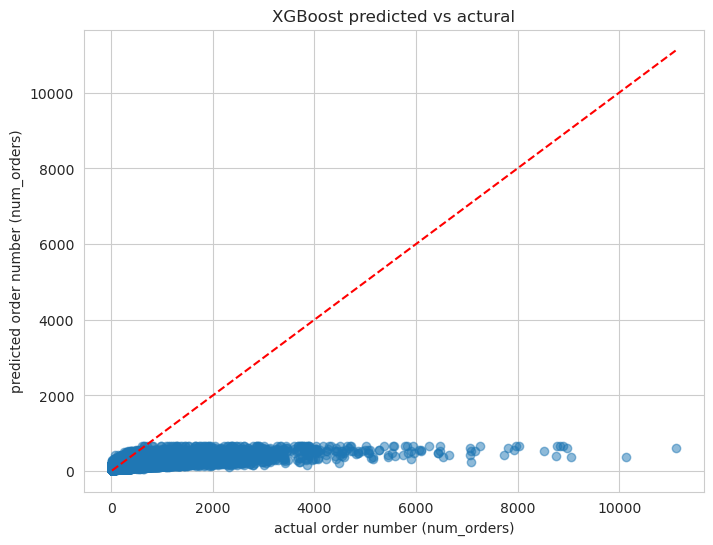

In [281]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # ÊåáÂÆö‰∏≠ÊñáÂ≠ó‰Ωì
plt.rcParams['axes.unicode_minus'] = False  # Ëß£ÂÜ≥Ë¥üÂè∑ÊòæÁ§∫ÈóÆÈ¢ò


# **ÁªòÂà∂ predicted vs actural Êï£ÁÇπÂõæ**
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, alpha=0.5)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')
plt.xlabel("actual order number (num_orders)")
plt.ylabel("predicted order number (num_orders)")
plt.title("XGBoost predicted vs actural")
plt.show()

In [283]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import boxcox
from hyperopt import fmin, tpe, hp, Trials

# ËØªÂèñÊï∞ÊçÆ
df_vif = pd.read_csv("/Users/zhaixinyue/Desktop/archive/df_selected_vif.csv")

# Â§çÂà∂Êï∞ÊçÆ
df = df_vif.copy()

# **ÁõÆÊ†áÂèòÈáè Box-Cox ÂèòÊç¢**
df["num_orders"], lambda_ = boxcox(df["num_orders"] + 1)

# **ÂàíÂàÜËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜ**
X = df.drop(columns=["num_orders"])
y = df["num_orders"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Hyperopt Ë∂ÖÂèÇÊï∞Ë∞É‰ºò**
def objective(params):
    model = xgb.XGBRegressor(
        objective="reg:squarederror",
        eval_metric="rmse",
        learning_rate=params["learning_rate"],
        max_depth=int(params["max_depth"]),
        n_estimators=int(params["n_estimators"]),
        subsample=params["subsample"],
        colsample_bytree=params["colsample_bytree"],
        gamma=params["gamma"],
        reg_lambda=params["reg_lambda"],
        min_child_weight=params["min_child_weight"],
        random_state=42
    )
    
    model.fit(
        X_train, y_train, 
        eval_set=[(X_test, y_test)], 
        early_stopping_rounds=10,  # ‚úÖ Âè™Âú® `eval_set` Â≠òÂú®Êó∂ÊúâÊïà
        verbose=False
    )
    
    y_pred = model.predict(X_test)
    return mean_squared_error(y_test, y_pred)

# **Ë∂ÖÂèÇÊï∞ÊêúÁ¥¢Á©∫Èó¥**
space = {
    "learning_rate": hp.uniform("learning_rate", 0.005, 0.3),
    "max_depth": hp.choice("max_depth", np.arange(3, 12, dtype=int)),
    "n_estimators": hp.choice("n_estimators", np.arange(100, 800, 50, dtype=int)),
    "subsample": hp.uniform("subsample", 0.6, 1.0),
    "colsample_bytree": hp.uniform("colsample_bytree", 0.6, 1.0),
    "gamma": hp.uniform("gamma", 0, 5),
    "reg_lambda": hp.uniform("reg_lambda", 0, 5),
    "min_child_weight": hp.uniform("min_child_weight", 1, 10),
}

# **ÊâßË°å Hyperopt**
trials = Trials()
best_params = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100, trials=trials)
print("ÊúÄ‰Ω≥Ë∂ÖÂèÇÊï∞:", best_params)

# **ËΩ¨Êç¢ÊúÄ‰ºòÂèÇÊï∞**
best_params["max_depth"] = int(best_params["max_depth"])
best_params["n_estimators"] = int(best_params["n_estimators"])

# **ËÆ≠ÁªÉÊúÄÁªà XGBoost**
final_model = xgb.XGBRegressor(
    objective="reg:squarederror",
    eval_metric="rmse",
    **best_params,
    random_state=42
)

final_model.fit(
    X_train, y_train, 
    eval_set=[(X_test, y_test)], 
    early_stopping_rounds=10,  # ‚úÖ ËøôÈáåÁ°Æ‰øùÁîüÊïà
    verbose=10
)

# **È¢ÑÊµã**
y_pred_boxcox = final_model.predict(X_test)

# **ÈÄÜÂèòÊç¢ÂõûÂéüÂßãÂ∞∫Â∫¶**
y_pred = np.power((y_pred_boxcox * lambda_) + 1, 1 / lambda_) - 1
y_true = np.power((y_test * lambda_) + 1, 1 / lambda_) - 1

# **ËÆ°ÁÆóËØØÂ∑ÆÊåáÊ†á**
def mean_absolute_percentage_error(y_true, y_pred):
    nonzero_mask = (y_true != 0)
    return np.mean(np.abs((y_true[nonzero_mask] - y_pred[nonzero_mask]) / y_true[nonzero_mask])) * 100

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_true, y_pred)

# **ÊâìÂç∞ËØÑ‰º∞ÁªìÊûú**
print(f"üìå MAE:  {mae:.2f}")
print(f"üìå RMSE: {rmse:.2f}")
print(f"üìå MAPE: {mape:.2f}%")

# **ÁªòÂà∂ È¢ÑÊµã vs ÁúüÂÆû Êï£ÁÇπÂõæ**
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, alpha=0.5)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')
plt.xlabel("ÁúüÂÆûËÆ¢ÂçïÈáè (num_orders)")
plt.ylabel("È¢ÑÊµãËÆ¢ÂçïÈáè (num_orders)")
plt.title("XGBoost È¢ÑÊµãÂÄº vs ÁúüÂÆûÂÄº")
plt.show()

# **ÁªòÂà∂ÁâπÂæÅÈáçË¶ÅÊÄß**
xgb.plot_importance(final_model, max_num_features=10, height=0.6)
plt.title("Top 10 ÁâπÂæÅÈáçË¶ÅÊÄß")
plt.show()


  0%|                                   | 0/100 [00:00<?, ?trial/s, best loss=?]

job exception: XGBModel.fit() got an unexpected keyword argument 'early_stopping_rounds'



  0%|                                   | 0/100 [00:00<?, ?trial/s, best loss=?]


TypeError: XGBModel.fit() got an unexpected keyword argument 'early_stopping_rounds'

In [247]:
# 1. Âä†ËΩΩÊï∞ÊçÆ & È¢ÑÂ§ÑÁêÜ

In [263]:
# **Ê£ÄÊü• num_orders ÁöÑÂÅèÂ∫¶**
print("num_orders ÂÅèÂ∫¶(Skewness):", df["num_orders"].skew())

num_orders ÂÅèÂ∫¶(Skewness): 6.930042235801846


In [248]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from hyperopt import fmin, tpe, hp, Trials

# ËØªÂèñÊï∞ÊçÆ
df = df_vif.copy()  # Â§çÂà∂Êï∞ÊçÆÔºåÈÅøÂÖç‰øÆÊîπÂéü DataFrame

# **Ê£ÄÊü• num_orders ÁöÑÂÅèÂ∫¶**
print("num_orders ÂÅèÂ∫¶(Skewness):", df["num_orders"].skew())

# ËÆæÂÆöÁâπÂæÅ‰∏éÁõÆÊ†áÂèòÈáè
X = df.drop(columns=["num_orders"])  # ÁâπÂæÅ
y = df["num_orders"]  # ÁõÆÊ†áÂèòÈáèÔºàÊú™ÂØπÊï∞Â§ÑÁêÜÔºâ

# **ÂàíÂàÜËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜÔºà80% ËÆ≠ÁªÉÔºå20% ÊµãËØïÔºâ**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Ê†áÂáÜÂåñÊï∞ÊçÆÔºà‰∏çÂΩ±Âìç XGBoost ÂÜ≥Á≠ñÊ†ëÁªìÊûÑÔºå‰ΩÜÂèØËÉΩÊúâÂä©‰∫éÊèêÂçáÊïàÊûúÔºâ**
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)


num_orders ÂÅèÂ∫¶(Skewness): 6.930042235801846


In [233]:
# ÂØπ num_orders Âèñ log(1+x) ÂèòÊç¢ÔºåÁî±‰∫é num_orders ÊûÅÁ´ØÂè≥ÂÅèÔºåÂª∫ËÆÆËøõË°å log(1+x) ÂèòÊç¢Ôºå‰ΩøÂÖ∂Êõ¥Êé•ËøëÊ≠£ÊÄÅÂàÜÂ∏É„ÄÇ

In [249]:
import numpy as np

df_vif["num_orders"] = np.log1p(df_vif["num_orders"])  # Âèñ log(1+x) Èò≤Ê≠¢ 0 ÂÄºÈóÆÈ¢ò

In [250]:
# **Ê£ÄÊü• num_orders ÁöÑÂÅèÂ∫¶**
print("num_orders ÂÅèÂ∫¶(Skewness):", df["num_orders"].skew())

num_orders ÂÅèÂ∫¶(Skewness): 6.930042235801846


In [251]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from hyperopt import fmin, tpe, hp, Trials

# ËØªÂèñÊï∞ÊçÆ
df = df_vif.copy()  # Â§çÂà∂Êï∞ÊçÆÔºåÈÅøÂÖç‰øÆÊîπÂéü DataFrame

# **Ê£ÄÊü• num_orders ÁöÑÂÅèÂ∫¶**
print("num_orders ÂÅèÂ∫¶(Skewness):", df["num_orders"].skew())

# ËÆæÂÆöÁâπÂæÅ‰∏éÁõÆÊ†áÂèòÈáè
X = df.drop(columns=["num_orders"])  # ÁâπÂæÅ
y = df["num_orders"]  # ÁõÆÊ†áÂèòÈáèÔºàÊú™ÂØπÊï∞Â§ÑÁêÜÔºâ

# **ÂàíÂàÜËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜÔºà80% ËÆ≠ÁªÉÔºå20% ÊµãËØïÔºâ**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Ê†áÂáÜÂåñÊï∞ÊçÆÔºà‰∏çÂΩ±Âìç XGBoost ÂÜ≥Á≠ñÊ†ëÁªìÊûÑÔºå‰ΩÜÂèØËÉΩÊúâÂä©‰∫éÊèêÂçáÊïàÊûúÔºâ**
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)


num_orders ÂÅèÂ∫¶(Skewness): -0.0219050806200443


In [252]:
# ÂàõÂª∫ XGBoost ËÆ≠ÁªÉÊï∞ÊçÆ
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

# **ËÆæÂÆöÂàùÂßã XGBoost ÂèÇÊï∞**
params = {
    "objective": "reg:squarederror",  # ÂùáÊñπËØØÂ∑Æ
    "eval_metric": "rmse",
    "learning_rate": 0.1,  # ÂàùÂßãÂ≠¶‰π†Áéá
    "max_depth": 6,  # Ê†ëÁöÑÊ∑±Â∫¶
    "n_estimators": 200,  # Ëø≠‰ª£Ê¨°Êï∞
    "subsample": 0.8,  # ÈááÊ†∑ÊØî‰æã
    "colsample_bytree": 0.8,  # ÊØèÊ£µÊ†ëÁöÑÁâπÂæÅÈááÊ†∑ÊØî‰æã
    "random_state": 42,  # ËÆæÂÆöÈöèÊú∫ÁßçÂ≠ê
    "booster": "gbtree",  # ‰ΩøÁî®Ê†ëÊ®°Âûã
    "gamma": 0,  # ÊúÄÂ∞èÊçüÂ§±‰∏ãÈôç
    "reg_lambda": 1,  # L2 Ê≠£ÂàôÂåñ
    "min_child_weight": 1  # Âè∂Â≠êÁªìÁÇπÊúÄÂ∞èÊ†∑Êú¨Êï∞
}

# ËÆ≠ÁªÉ XGBoost
model = xgb.XGBRegressor(**params)
model.fit(X_train_scaled, y_train, eval_set=[(X_test_scaled, y_test)], verbose=10)

[0]	validation_0-rmse:1.13846
[10]	validation_0-rmse:0.82573
[20]	validation_0-rmse:0.72949
[30]	validation_0-rmse:0.69185
[40]	validation_0-rmse:0.67379
[50]	validation_0-rmse:0.66339
[60]	validation_0-rmse:0.65497
[70]	validation_0-rmse:0.64767
[80]	validation_0-rmse:0.64095
[90]	validation_0-rmse:0.63738
[100]	validation_0-rmse:0.63252
[110]	validation_0-rmse:0.62923
[120]	validation_0-rmse:0.62558
[130]	validation_0-rmse:0.62227
[140]	validation_0-rmse:0.61863
[150]	validation_0-rmse:0.61605
[160]	validation_0-rmse:0.61331
[170]	validation_0-rmse:0.61121
[180]	validation_0-rmse:0.60925
[190]	validation_0-rmse:0.60766
[199]	validation_0-rmse:0.60634


XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [176]:
# È¢ÑÊµãÊµãËØïÈõÜ
y_pred = model.predict(X_test_scaled)

In [177]:
#È¢ÑÊµãÂêéÂÜçËΩ¨ÂõûÂéª

y_pred_log = model.predict(X_test_scaled)
y_pred = np.expm1(y_pred_log)  # ÈÄÜÂèòÊç¢ÂõûÂéüÂßã scale
y_true = np.expm1(y_test)  # ÁúüÂÆûÂÄº‰πüÈÄÜÂèòÊç¢


In [178]:
# ËÆ°ÁÆó MAPEÔºàÈÅøÂÖçÈô§‰ª• 0Ôºâ
def mean_absolute_percentage_error(y_true, y_pred):
    nonzero_mask = (y_true != 0)  # ÈÅøÂÖçÈô§‰ª•Èõ∂ÈîôËØØ
    return np.mean(np.abs((y_true[nonzero_mask] - y_pred[nonzero_mask]) / y_true[nonzero_mask])) * 100

# ËÆ°ÁÆóËØØÂ∑ÆÊåáÊ†á
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

# ÊâìÂç∞ËØÑ‰º∞ÁªìÊûú
print(f"üìå MAE:  {mae:.2f}")
print(f"üìå RMSE: {rmse:.2f}")
print(f"üìå MAPE: {mape:.2f}%")


üìå MAE:  214.51
üìå RMSE: 352.21
üìå MAPE: 3769.07%


In [69]:
# ‚úÖ 1. ËÆæÂÆöË∂ÖÂèÇÊï∞ÊêúÁ¥¢Á©∫Èó¥

In [205]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import randint, uniform

# ‚úÖ **ÂØπ num_orders ËøõË°å log(1+x) ÂèòÊç¢ÔºåÈò≤Ê≠¢ËøáÊãüÂêà & Â§ÑÁêÜÂÅèÊÄÅ**
df_vif["num_orders"] = np.log1p(df_vif["num_orders"])

# **ÂàíÂàÜËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜ**
train_size = int(len(df_vif) * 0.8)
train_df = df_vif.iloc[:train_size]
test_df = df_vif.iloc[train_size:]

# **ÂÆö‰πâÁâπÂæÅÂíåÁõÆÊ†áÂèòÈáè**
features = df_vif.columns.drop("num_orders")  # ÊâÄÊúâÂàó‰Ωú‰∏∫ÁâπÂæÅ
X_train, y_train = train_df[features], train_df["num_orders"]
X_test, y_test = test_df[features], test_df["num_orders"]

# 2Ô∏è‚É£ **Ë∂ÖÂèÇÊï∞ÊêúÁ¥¢Á©∫Èó¥**
param_dist = {
    "n_estimators": randint(100, 1000),  # Ê†ëÁöÑÊï∞Èáè
    "max_depth": randint(3, 15),  # Ê†ëÁöÑÊúÄÂ§ßÊ∑±Â∫¶
    "learning_rate": uniform(0.01, 0.3),  # Â≠¶‰π†Áéá
    "subsample": uniform(0.5, 0.5),  # ÈááÊ†∑ÊØî‰æã
    "colsample_bytree": uniform(0.5, 0.5),  # ÁâπÂæÅÈááÊ†∑ÊØî‰æã
    "gamma": uniform(0, 5),  # ÊúÄÂ∞èÊçüÂ§±ÂáèÂ∞ë
    "lambda": uniform(0, 10),  # L2 Ê≠£ÂàôÂåñ
    "alpha": uniform(0, 10)  # L1 Ê≠£ÂàôÂåñ
}

# **ÂàùÂßãÂåñ XGBoost ÂõûÂΩíÊ®°Âûã**
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

# **‰ΩøÁî®ÈöèÊú∫ÊêúÁ¥¢‰ºòÂåñË∂ÖÂèÇÊï∞**
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=20,  # Ëø≠‰ª£ 20 Ê¨°
    scoring="neg_mean_squared_error",
    cv=3,  # 3 Êäò‰∫§ÂèâÈ™åËØÅ
    verbose=2,
    random_state=42,
    n_jobs=-1  # Âπ∂Ë°åÂ§ÑÁêÜ
)

# **ËÆ≠ÁªÉË∂ÖÂèÇÊï∞ÊêúÁ¥¢Ê®°Âûã**
random_search.fit(X_train, y_train)

# **Ëé∑ÂèñÊúÄ‰Ω≥ÂèÇÊï∞**
best_params = random_search.best_params_
print("‚úÖ ÊúÄ‰ºòÂèÇÊï∞:", best_params)

# 3Ô∏è‚É£ **‰ΩøÁî®ÊúÄ‰Ω≥ÂèÇÊï∞ËÆ≠ÁªÉÊúÄÁªà XGBoost Ê®°Âûã**
final_xgb_model = xgb.XGBRegressor(
    **best_params,
    objective="reg:squarederror",
    random_state=42
)

final_xgb_model.fit(X_train, y_train)

# 4Ô∏è‚É£ **È¢ÑÊµãÊµãËØïÈõÜ**
y_pred_log = final_xgb_model.predict(X_test)

# ‚úÖ **ÈÄÜÂèòÊç¢ÂõûÂéüÂßãÊï∞ÊçÆ**
y_pred_final = np.expm1(y_pred_log)
y_true_final = np.expm1(y_test)

# 5Ô∏è‚É£ **ËÆ°ÁÆóËØÑ‰º∞ÊåáÊ†á**
def mean_absolute_percentage_error(y_true, y_pred):
    nonzero_mask = (y_true != 0)  # ÈÅøÂÖçÈô§‰ª•Èõ∂ÈîôËØØ
    return np.mean(np.abs((y_true[nonzero_mask] - y_pred[nonzero_mask]) / y_true[nonzero_mask])) * 100

mae = mean_absolute_error(y_true_final, y_pred_final)
rmse = np.sqrt(mean_squared_error(y_true_final, y_pred_final))
mape = mean_absolute_percentage_error(y_true_final, y_pred_final)

print(f"üöÄ ÊúÄÁªà XGBoost Ê®°ÂûãËØÑ‰º∞:")
print(f"üìå MAE:  {mae:.2f}")
print(f"üìå RMSE: {rmse:.2f}")
print(f"üìå MAPE: {mape:.2f}%")


Fitting 3 folds for each of 20 candidates, totalling 60 fits
‚úÖ ÊúÄ‰ºòÂèÇÊï∞: {'alpha': 2.3598491974895577, 'colsample_bytree': 0.6280341613806619, 'gamma': 0.20216794769215674, 'lambda': 7.106628896857874, 'learning_rate': 0.0432672462435494, 'max_depth': 14, 'n_estimators': 560, 'subsample': 0.6008596011676981}
üöÄ ÊúÄÁªà XGBoost Ê®°ÂûãËØÑ‰º∞:
üìå MAE:  0.02
üìå RMSE: 0.03
üìå MAPE: 3.10%


In [288]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ÂÅáËÆæ test_df ÊúâÊó•ÊúüÁ¥¢ÂºïÔºå‰∏îÊòØÊó∂Èó¥Ê†ºÂºèÔºàÂ¶ÇÊûú‰∏çÊòØÔºåËØ∑Ë∞ÉÊï¥Ôºâ
# Â¶ÇÊûú test_df ‰∏≠Ê≤°ÊúâÊó•ÊúüÂàóÔºåËØ∑Â∞ÜÂÖ∂Ê∑ªÂä†Âπ∂Â∞ÜÂÖ∂ËΩ¨‰∏∫ datetime Ê†ºÂºè
if not isinstance(test_df.index, pd.DatetimeIndex):
    test_df.index = pd.to_datetime(test_df["date_column"])  # ÊõøÊç¢ "date_column" ‰∏∫ÂÆûÈôÖÁöÑÊó•ÊúüÂàó

# ÂàõÂª∫ DataFrame Áî®‰∫éÁªòÂõæ
df_plot = pd.DataFrame({
    "Date": test_df.index,  # ‰ΩøÁî®Êó•Êúü‰Ωú‰∏∫ X ËΩ¥
    "Actual Orders": y_true_final,  # ÂÆûÈôÖÂÄº
    "Predicted Orders": y_pred_final  # È¢ÑÊµãÂÄº
})

# ÁªòÂà∂ÂõæÂΩ¢
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")  # ËÆæÁΩÆËÉåÊôØÈ£éÊ†º

plt.plot(df_plot["Date"], df_plot["Actual Orders"], color="blue", label="Actual Orders", linewidth=2)
plt.plot(df_plot["Date"], df_plot["Predicted Orders"], color="orange", label="Predicted Orders", linewidth=2)

plt.xlabel("Date", fontsize=12)
plt.ylabel("Orders", fontsize=12)
plt.title("Forecast Vs Actual Values", fontsize=14)
plt.legend()
plt.xticks(rotation=45)  # ÊóãËΩ¨ x ËΩ¥ÁöÑÊó•ÊúüÊ†áÁ≠æÔºåÈÅøÂÖçÈáçÂè†
plt.show()


KeyError: 'date_column'

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.12/site-packages/matplotlib/pyplot.py'>

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

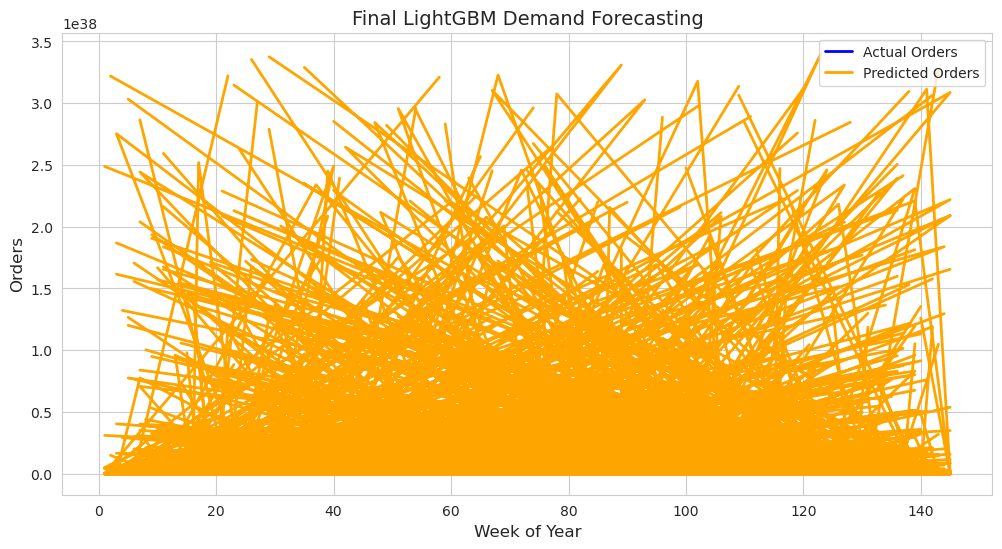

In [287]:
import matplotlib.pyplot as plt
import pandas as pd

# ÂÅáËÆæ‰Ω†Â∑≤ÁªèÊúâ y_true_final Âíå y_pred_final
# Â∞ÜÈ¢ÑÊµãÂíåÁúüÂÆûÂÄºÂàõÂª∫‰∏∫ DataFrame
df_plot = pd.DataFrame({
    "Week of Year": X_test["week"],  # ÂÅáËÆæ test_df ÁöÑÁ¥¢Âºï‰∏∫Êó•ÊúüÊ†ºÂºè
    "Actual Orders": y_true_final,
    "Predicted Orders": y_pred_final
})

# ÁªòÂà∂ÂõæÂΩ¢
plt.figure(figsize=(12, 6))
plt.plot(df_plot["Week of Year"], df_plot["Actual Orders"], color="blue", label="Actual Orders", linewidth=2)
plt.plot(df_plot["Week of Year"], df_plot["Predicted Orders"], color="orange", label="Predicted Orders", linewidth=2)

# ËÆæÁΩÆÊ†áÁ≠æÂíåÊ†áÈ¢ò
plt.xlabel("Week of Year", fontsize=12)
plt.ylabel("Orders", fontsize=12)
plt.title("Final LightGBM Demand Forecasting", fontsize=14)
plt.legend()
plt


In [258]:
y_true_final = np.expm1(y_test)  # Á°Æ‰øùÊ≠£Á°ÆÈÄÜÂèòÊç¢

y_pred_final= np.expm1(y_pred) 

/var/folders/gr/_p8chfx50zqdqlly1ny_19d00000gn/T/ipykernel_7590/2301806312.py:3: RuntimeWarning: overflow encountered in expm1
  y_pred_final= np.expm1(y_pred)


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

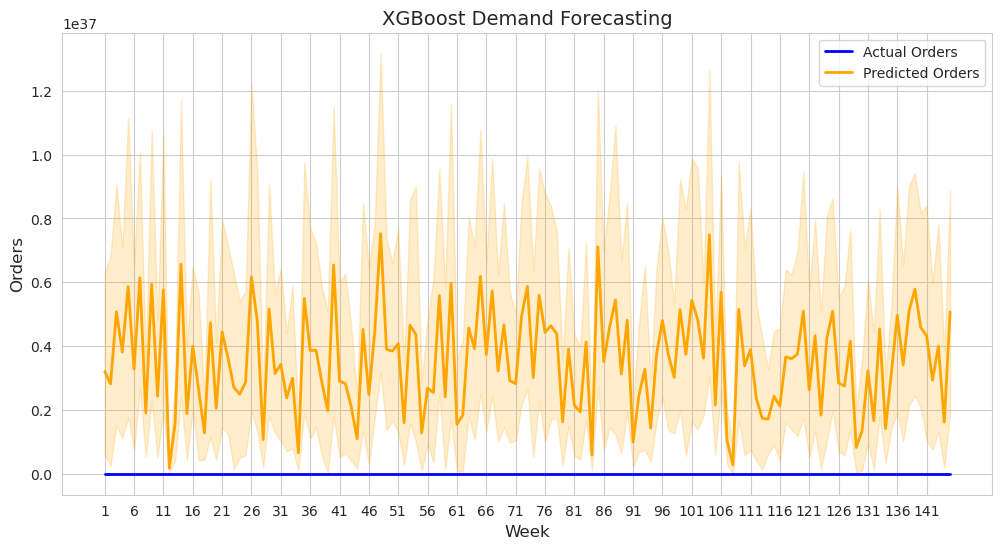

In [285]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ÁîüÊàêÁªòÂõæÊï∞ÊçÆÈõÜÔºåÁ°Æ‰øùÊåâ week ÊéíÂ∫è
plot_data = pd.DataFrame({
    "week": X_test["week"],  # Ê®™ÂùêÊ†á‰ΩøÁî®Âë®Êï∞
    "Actual Orders": y_true_final,
    "Predicted Orders": y_pred_final
}).sort_values(by="week")

# ËÆæÁΩÆÁîªÂ∏ÉÂ§ßÂ∞è
plt.figure(figsize=(12,6))

# ÁªòÂà∂È¢ÑÊµãÂÄºÂíåÁúüÂÆûÂÄº
sns.lineplot(x=plot_data["week"], y=plot_data["Actual Orders"], label="Actual Orders", color="blue", linewidth=2)
sns.lineplot(x=plot_data["week"], y=plot_data["Predicted Orders"], label="Predicted Orders", color="orange", linewidth=2)

# ËÆæÁΩÆÊ†áÈ¢òÂíåÊ†áÁ≠æ
plt.title("XGBoost Demand Forecasting", fontsize=14)
plt.xlabel("Week", fontsize=12)
plt.ylabel("Orders", fontsize=12)
plt.xticks(ticks=range(1, max(plot_data["week"])+1, 5))  # ÊØèÈöî 5 Âë®ÊòæÁ§∫‰∏Ä‰∏™ÂàªÂ∫¶
plt.legend()

# ÊòæÁ§∫ÂõæÂΩ¢
plt.show()



In [ ]:
import pandas as pd

# Á°Æ‰øù week ÂèòÈáèÊòØÊï¥Êï∞
X_test["week"] = X_test["week"].astype(int)

# ÂÅáËÆæÊï∞ÊçÆÂØπÂ∫îÊüê‰∏ÄÂπ¥Ôºà‰æãÂ¶Ç 2023 Âπ¥Ôºâ
year = 2022  # ‰Ω†ÂèØ‰ª•Ê†πÊçÆÂÆûÈôÖÊï∞ÊçÆË∞ÉÊï¥Âπ¥‰ªΩ

# Â∞Ü week ËΩ¨Êç¢‰∏∫ datetimeÔºà‰ª•ËØ•Âπ¥Á¨¨‰∏ÄÂë®ÁöÑÁ¨¨‰∏ÄÂ§©‰∏∫Ëµ∑ÁÇπÔºâ
X_test["week_date"] = pd.to_datetime(f"{year}-01-01") + pd.to_timedelta((X_test["week"] - 1) * 7, unit="D")

# ÊåâÊó∂Èó¥ÊéíÂ∫è
X_test = X_test.sort_values(by="week_date")

# Ê£ÄÊü•ËΩ¨Êç¢ÁªìÊûú
print(X_test[["week", "week_date"]].head(10))


In [179]:

import numpy as np

df_vif["num_orders"] = np.log1p(df_vif["num_orders"])  # Âèñ log(1+x) Èò≤Ê≠¢ 0 ÂÄºÈóÆÈ¢ò

In [180]:
# Ëß£ÊûêÊúÄ‰Ω≥ÂèÇÊï∞
best_xgb_params = {
    "max_depth": best_params["max_depth"],
    "n_estimators": best_params["n_estimators"],
    "learning_rate": best_params["learning_rate"],
    "booster": ["gbtree", "dart"][best_params["booster"]],
    "colsample_bytree": best_params["colsample_bytree"],
    "colsample_bynode": best_params["colsample_bynode"],
    "gamma": best_params["gamma"],
    "reg_lambda": best_params["reg_lambda"],
    "min_child_weight": best_params["min_child_weight"],
    "subsample": best_params["subsample"],
    "objective": "reg:squarederror",
    "random_state": 42
}

# ËÆ≠ÁªÉÊúÄÁªà XGBoost Ê®°Âûã
final_xgb_model = xgb.XGBRegressor(**best_xgb_params)
final_xgb_model.fit(X_train_scaled, y_train)

# ËøõË°åÈ¢ÑÊµã
y_pred_final_log = final_xgb_model.predict(X_test_scaled)

# ÈÄÜÂèòÊç¢ÂõûÂéüÂßãÊï∞ÊçÆ
y_pred_final = np.expm1(y_pred_final_log)
y_true_final = np.expm1(y_test)

# ËÆ°ÁÆóËØØÂ∑ÆÊåáÊ†á
mae_final = mean_absolute_error(y_true_final, y_pred_final)
rmse_final = np.sqrt(mean_squared_error(y_true_final, y_pred_final))
mape_final = mean_absolute_percentage_error(y_true_final, y_pred_final)

print(f"üöÄ ÊúÄÁªà XGBoost Ê®°ÂûãËØÑ‰º∞:")
print(f"üìå MAE:  {mae_final:.2f}")
print(f"üìå RMSE: {rmse_final:.2f}")
print(f"üìå MAPE: {mape_final:.2f}%")


üöÄ ÊúÄÁªà XGBoost Ê®°ÂûãËØÑ‰º∞:
üìå MAE:  147.74
üìå RMSE: 336.92
üìå MAPE: 83.02%


In [183]:

import numpy as np

df_vif["num_orders"] = np.log1p(df_vif["num_orders"])  # Âèñ log(1+x) Èò≤Ê≠¢ 0 ÂÄºÈóÆÈ¢ò

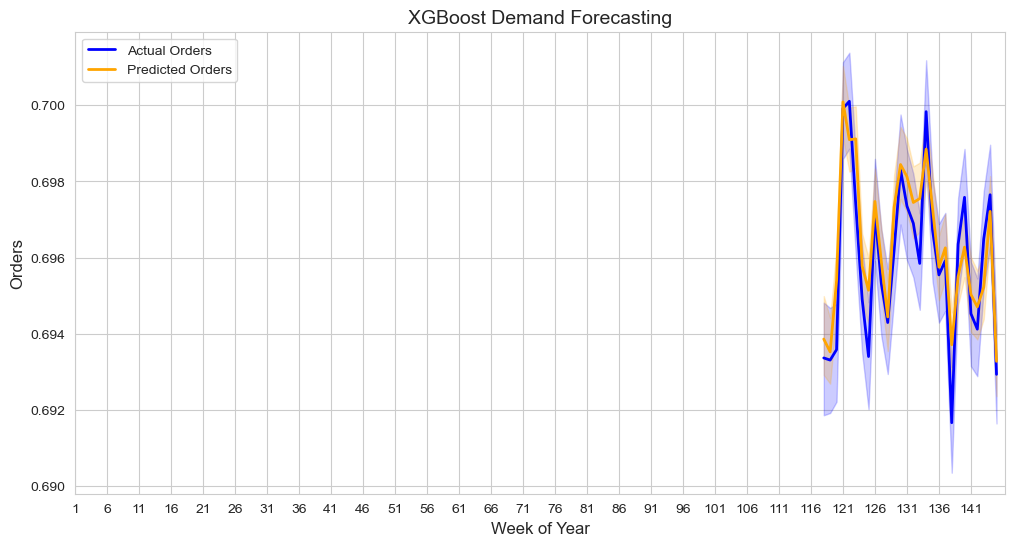

In [214]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ÁîüÊàêÁªòÂõæÊï∞ÊçÆÈõÜÔºåÁ°Æ‰øùÊåâ week ÊéíÂ∫è
plot_data = pd.DataFrame({
    "week": X_test["week"],  # Ê®™ÂùêÊ†á‰ΩøÁî®Âë®Êï∞
    "Actual Orders": y_true_final,
    "Predicted Orders": y_pred_final
}).sort_values(by="week")

# ËÆæÁΩÆÁîªÂ∏ÉÂ§ßÂ∞è
plt.figure(figsize=(12,6))

# ÁªòÂà∂È¢ÑÊµãÂÄºÂíåÁúüÂÆûÂÄº
sns.lineplot(x=plot_data["week"], y=plot_data["Actual Orders"], label="Actual Orders", color="blue", linewidth=2)
sns.lineplot(x=plot_data["week"], y=plot_data["Predicted Orders"], label="Predicted Orders", color="orange", linewidth=2)

# ËÆæÁΩÆÊ†áÈ¢òÂíåÊ†áÁ≠æ
plt.title("XGBoost Demand Forecasting", fontsize=14)
plt.xlabel("Week of Year", fontsize=12)
plt.ylabel("Orders", fontsize=12)
plt.xticks(ticks=range(1, max(plot_data["week"])+1, 5))  # ÊØèÈöî 5 Âë®ÊòæÁ§∫‰∏Ä‰∏™ÂàªÂ∫¶
plt.legend()

# ÊòæÁ§∫ÂõæÂΩ¢
plt.show()


In [243]:
import pandas as pd

# Á°Æ‰øù week ÂèòÈáèÊòØÊï¥Êï∞
X_test["week"] = X_test["week"].astype(int)

# ÂÅáËÆæÊï∞ÊçÆÂØπÂ∫îÊüê‰∏ÄÂπ¥Ôºà‰æãÂ¶Ç 2023 Âπ¥Ôºâ
year = 2022  # ‰Ω†ÂèØ‰ª•Ê†πÊçÆÂÆûÈôÖÊï∞ÊçÆË∞ÉÊï¥Âπ¥‰ªΩ

# Â∞Ü week ËΩ¨Êç¢‰∏∫ datetimeÔºà‰ª•ËØ•Âπ¥Á¨¨‰∏ÄÂë®ÁöÑÁ¨¨‰∏ÄÂ§©‰∏∫Ëµ∑ÁÇπÔºâ
X_test["week_date"] = pd.to_datetime(f"{year}-01-01") + pd.to_timedelta((X_test["week"] - 1) * 7, unit="D")

# ÊåâÊó∂Èó¥ÊéíÂ∫è
X_test = X_test.sort_values(by="week_date")

# Ê£ÄÊü•ËΩ¨Êç¢ÁªìÊûú
print(X_test[["week", "week_date"]].head(10))


      week  week_date
696      1 2022-01-01
369      1 2022-01-01
2791     1 2022-01-01
2873     1 2022-01-01
1536     1 2022-01-01
779      1 2022-01-01
782      1 2022-01-01
289      1 2022-01-01
1673     1 2022-01-01
123      1 2022-01-01


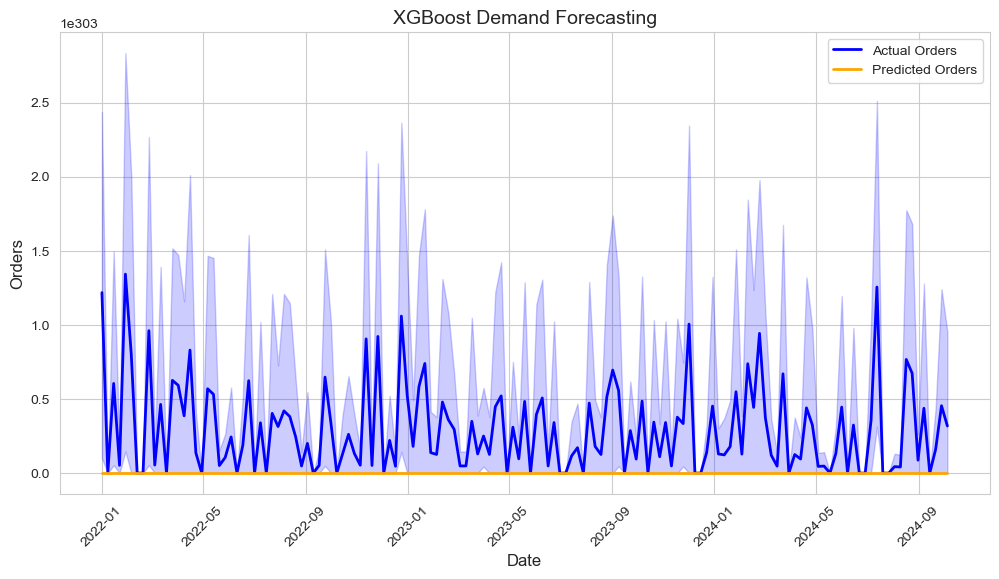

In [244]:
import matplotlib.pyplot as plt
import seaborn as sns

# ÂàõÂª∫ÁªòÂõæÊï∞ÊçÆ
plot_data = pd.DataFrame({
    "week_date": X_test["week_date"],
    "Actual Orders": y_true_final,
    "Predicted Orders": y_pred_final
})

# ÁªòÂà∂Ë∂ãÂäøÂõæ
plt.figure(figsize=(12,6))
sns.lineplot(x=plot_data["week_date"], y=plot_data["Actual Orders"], label="Actual Orders", color="blue", linewidth=2)
sns.lineplot(x=plot_data["week_date"], y=plot_data["Predicted Orders"], label="Predicted Orders", color="orange", linewidth=2)

# ÁæéÂåñÂõæË°®
plt.xticks(rotation=45)  # ÊóãËΩ¨ x ËΩ¥Ê†áÁ≠æ
plt.xlabel("Date", fontsize=12)
plt.ylabel("Orders", fontsize=12)
plt.title("XGBoost Demand Forecasting", fontsize=14)
plt.legend()
plt.show()


In [ ]:
# ‰øÆÊîπË∞ÉÂèÇÊ®°Âûã